In [41]:
import pandas as pd

credit = pd.read_csv('../data/Credit.csv')
credit = credit.drop(credit.columns[0], axis=1)

X = credit.iloc[:, :10]
y = credit.iloc[:, 10:]

X['Gender'] = X.Gender.map({'Male': 1, 'Female': 0})
X.Married = X.Married.map({'Yes': 1, 'No':0})
X.Student = X.Student.map({'Yes': 1, 'No': 0})

credit.head(10)

# X.Ethnicity.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [42]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelBinarizer

# lb_encoder = LabelEncoder()
# X['Ethnicity_code'] = lb_encoder.fit_transform(X['Ethnicity'])
# print(X.head(10))

# lb_style = LabelBinarizer()
# lb_results = lb_style.fit_transform(X['Ethnicity_code'])
# lb_results[:10]

X = pd.get_dummies(X, columns=['Ethnicity'], prefix=['Ethnicity'])

X.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,1,0,1,0,0,1
1,106.025,6645,483,3,82,15,0,1,1,0,1,0
2,104.593,7075,514,4,71,11,1,0,0,0,1,0
3,148.924,9504,681,3,36,11,0,0,0,0,1,0
4,55.882,4897,357,2,68,16,1,0,1,0,0,1
5,80.180,8047,569,4,77,10,1,0,0,0,0,1
6,20.996,3388,259,2,37,12,0,0,0,1,0,0
7,71.408,7114,512,2,87,9,1,0,0,0,1,0
8,15.125,3300,266,5,66,13,0,0,0,0,0,1
9,71.061,6819,491,3,41,19,0,1,1,1,0,0


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Applying models

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def run_model(model, model_name, plot_index):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_pred))
    
    plot_index -= 1
    ax = axes[plot_index//3, plot_index%3]
    
    ax.scatter(X_test.iloc[:, 0], y_test.iloc[:, 0], color='blue', marker='.', label='Ground truth')
    ax.scatter(X_test.iloc[:, 0], y_pred, color='red', marker='o', facecolors='none', label='Ground truth')
    
    ax.legend(loc='lower right')
    ax.set_title(model_name + ': error = ' + str(round(error,4)))
    
    
    
    
    

C:\Users\Trang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[18:37:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


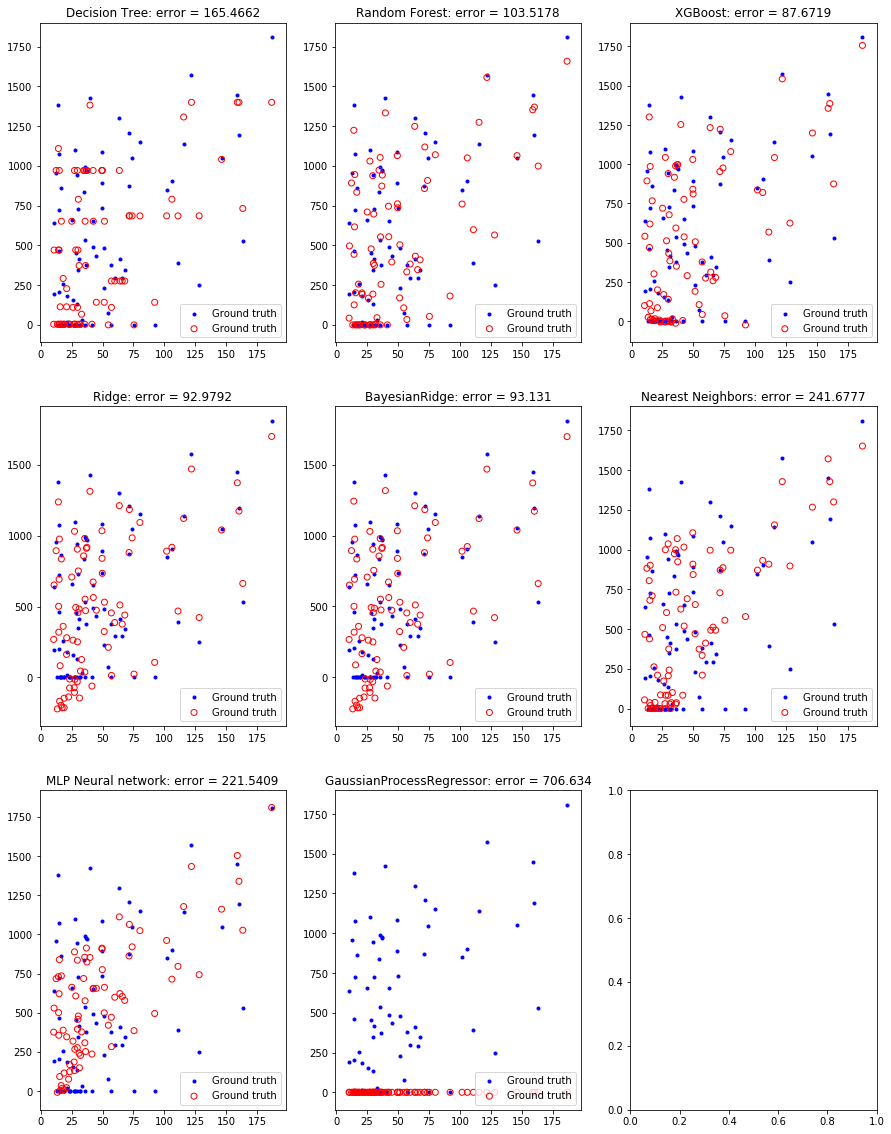

In [51]:
fig = plt.figure(figsize=(15, 20))
axes = fig.subplots(nrows=3, ncols=3)

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
run_model(model, "Random Forest", 2)

# # ----- xgboost ------------
# # install xgboost
# # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079
from xgboost import XGBRegressor

model = XGBRegressor()
run_model(model, "XGBoost", 3)

# # ----- Ridge ------------
from sklearn.linear_model import Ridge

model = Ridge()
run_model(model, "Ridge", 4)

# # ------ BayesianRidge ----------------
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
run_model(model, "BayesianRidge", 5)

# # -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
run_model(model, "Nearest Neighbors", 6)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
run_model(model, "MLP Neural network", 7)

# ----------- GaussianProcessRegressor  ------------
from sklearn.gaussian_process import GaussianProcessRegressor

model = GaussianProcessRegressor()
run_model(model, "GaussianProcessRegressor", 8)